### Import

https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gamma
from numpy import exp, sqrt, pi, math
from math import factorial as fctl
from uncertainties import ufloat, unumpy as unp
from uncertainties import umath

### Definitionen

In [2]:
def chi_2(f, fit, x, y, yerr, name = ''):
    chi_sq = np.sum( (f(x, *fit) - y)**2 / yerr **2)
    dof = len(y) - len(fit)
    chi_sq_red = chi_sq / dof
    prob = round(1 - chi2.cdf(chi_sq, dof), 3) * 1e2
    if name == '':
        print('chi_sq = ' + str(chi_sq), '\nchi_sq_red = ' + str(chi_sq_red), '\nFitwkt = ' + str(prob) + '%')
    else:
        print(name, 'chi_sq = ' + str(chi_sq), '\nchi_sq_red = ' + str(chi_sq_red), '\nFitwkt = ' + str(prob) + '%')
    return np.array([chi_sq, chi_sq_red, prob])

def perr(pcov):
    return np.sqrt(np.diag(pcov))

def uprint(name, value, error, unit = ''):
    print(name + str(ufloat(value, error)) + '  ' + unit)
    return np.array([ufloat(value, error)])

In [3]:
def gauß(x, A, mu, sig): # A: Fläche der Gaußfunktion
    return A / (sqrt(2 * pi) * sig) * exp (- (x-mu)**2 / 2 / sig**2)
def poisson(x, A_p, mu_p):
    return A_p * exp(-mu_p) * mu_p**x / gamma(x+1)
def binomial(n, k, p):
    return fctl(n) / (fctl(n-k) * fctl(k)) * (p **k) * ((1-p) **(n-k)) 
def lin(x, a, b): 
    return x * a + b
def twoexp(x, A1, l1, A2, l2):
    return A1 * np.exp(-x*l1) + A2 * np.exp(-x*l2)
def oneexp(x, A, l):
    return A * np.exp(-x*l)

### Hole Werte

In [4]:
# Werte - Array mit Wert und Fehler wenn vorhanden
n0 = np.array([123, 11]) # Nulleffekt über 5min
n0b = np.array([147, 12]) # Nulleffekt über 5min

# beta Strahlung
db = np.array([6.1, 0.1]) # Abstand zum Kollimator in cm
tb = np.array([30, 30, 30, 30, 30, 30, 30, 30, 120, 120, 120, 120, 300]) # Messdauer [s]
Nb = np.array([1100, 717, 458, 292, 223, 134, 73, 53, 114, 81, 76, 51, 147]) # Zahl der Zerfälle
dNb = np.sqrt(Nb)
xb = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0, 3.3, 4.3]) # Absorberdicke [mm]
nb = np.array([ Nb/tb*60 - n0b[0]/5, np.sqrt((dNb/tb*60)**2 + (n0b[1]/5)**2) ]) # Zählrate

# gamma Strahlung
dy = np.array([14.9, 0.1]) # Abstand zum Kollimator in cm
ty = 1 # Messdauer [min]
Ny = np.array([3950, 2631, 2012, 1495, 1021, 819, 633, 467, 330, 297, 204]) # Zahl der Zerfälle
dNy = np.sqrt(Ny)
xy = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]) # Absorberdicke [cm]
ny = np.array([ Ny - n0[0]/5, np.sqrt((dNy)**2 + (n0[1]/5)**2) ]) # Zählrate

# Aktvität
dc = np.array([[5, 10, 20], [0.3, 0.3, 0.3]]) # Abstand Präparat - Zählrohr [cm]
tc = 60 # Messdauer [s]
Nc = np.array([32496, 10614, 2930]) # Zahl der Zerfälle
dNc = np.sqrt(Nc)
nc = np.array([ Nc/(2*tc), dNc/(2*tc) ]) # Zählrate - durch 2 teilen da je 2 Gammaquanten emittiert werden
e = .04 # Ansprechwkt
r = 14 / 2 * 1e-1 # Zählrohrradius [cm]
l = 4 # Zählrohrlänge [cm]

# alpha Strahlung
p = np.array([[21, 101, 197, 298, 398, 418, 443, 462, 479, 513, 606, 692, 852, 988], 
              [2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1]]) # Druck
da = 4.2 # Abstand Präparat - Zählrohr
ta = 1 # Messdauer - hier in min!
na = np.array([13258, 13179, 12859, 12889, 8824, 6660, 3981, 2407, 1311, 395, 222, 219, 201, 215]) # Zahl der Zerfälle
dna = np.sqrt(na)
p0 = 1013 # Normaldruck

#if len(U) != len(N):
#    print('Error:', len(U), len(N))

In [5]:
# Werte aus Datei


## 1 beta Strahlung

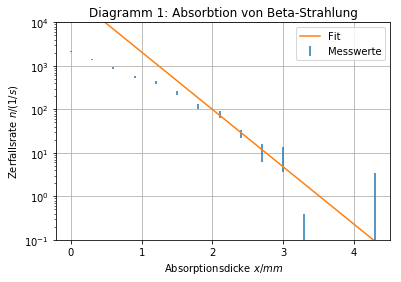

In [6]:
# Aufgabe 1 beta Strahlung
rg = np.array([7, 11]) # fitte linearen Bereich
popt, pcov = curve_fit(oneexp, xb[rg[0]:rg[1]], nb[0, rg[0]:rg[1]], sigma=nb[1, rg[0]:rg[1]])
pbeta = np.array([popt, perr(pcov)])

# Plot
plt.errorbar(xb, nb[0], yerr=nb[1], fmt='', linestyle='none', label='Messwerte')
plt.plot(xb, oneexp(xb, *popt), label='Fit')
plt.title('Diagramm 1: Absorbtion von Beta-Strahlung')
plt.xlabel('Absorptionsdicke $x/mm$')
plt.ylabel('Zerfallsrate $n/(1/s)$')
plt.ylim((1e-1, 1e4))
plt.yscale('log')
plt.grid()
plt.legend(loc='best')
plt.savefig("plot 1.pdf", format="pdf")

In [7]:
# maximale Reichweite aus Extrapolation [mm]
x_max = np.array([ np.log(pbeta[0,0])/pbeta[0,1] , 
                np.sqrt( (pbeta[1,1] * np.log(pbeta[0,0])/pbeta[0,1]**2)**2 + (pbeta[1,0] / (pbeta[0,0]*pbeta[0,1]))**2 )])
uprint('maximale Reichweite x_max = ', x_max[0], x_max[1], 'mm')
uprint('A = ', pbeta[0,0], pbeta[0,1])
uprint('l = ', pbeta[1,0], pbeta[1,1])

# Flächendichte
rho_al = 2.6989 # Dichte von Aluminium [g/cm^3]
Rb_al = rho_al*x_max[0]/10 # Flächendichte Al [g/cm^2]
Rb_es = 0.13 # Flächendichte Edelstahl [g/cm^2] aus Skript
Rb = np.array([Rb_al+Rb_es , rho_al*x_max[1]/10]) # Flächendichte gesamt [g/cm^2]
uprint('Flächendichte R_beta = ', Rb[0], Rb[1], 'g/cm^2')
print('Maximalenergie aus Abb. 8 im Skript: E = 2.23+/-0.27 MeV')

maximale Reichweite x_max = 3.5+/-0.5  mm
A = 43181.2+/-3.0  
l = 38890.2+/-0.4  
Flächendichte R_beta = 1.08+/-0.15  g/cm^2
Maximalenergie aus Abb. 8 im Skript: E = 2.23+/-0.27 MeV


## 2 gamma Strahlung

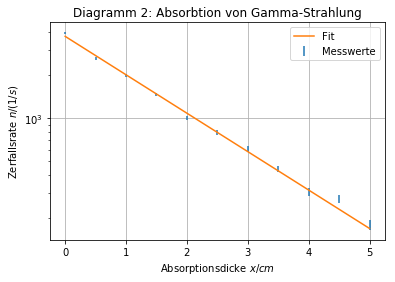

In [8]:
# Aufgabe 1 beta Strahlung
#rg = np.array([1, len(xy)])
popt, pcov = curve_fit(oneexp, xy, ny[0], sigma=ny[1])
pgamma = np.array([popt, perr(pcov)])

# Plot
plt.errorbar(xy, ny[0], yerr=ny[1], fmt='', linestyle='none', label='Messwerte')
plt.plot(xy, oneexp(xy, *popt), label='Fit')
plt.title('Diagramm 2: Absorbtion von Gamma-Strahlung')
plt.xlabel('Absorptionsdicke $x/cm$')
plt.ylabel('Zerfallsrate $n/(1/s)$')
#plt.ylim((10, 1e4))
plt.yscale('log')
plt.grid()
plt.legend(loc='best')
plt.savefig("plot 2.pdf", format="pdf")

In [9]:
#chi_2(oneexp, pgamma[0], xy, ny[0], ny[1])
uprint('Schwächungskoeffizient mu = ', pgamma[0,1], pgamma[1,1], '1/cm')
# Massenschwächungskoeffizient
rho_pb = 11.342 # [g/cm^3]
a = pgamma[0:2,1] / rho_pb # [cm^2/g]
uprint('Massenschwächungskoeffizient ', a[0], a[1], 'cm^2/g')
#print('Energie aus Abb. 9 im Skript: E = ', , ' MeV')

Schwächungskoeffizient mu = 0.619+/-0.014  1/cm
Massenschwächungskoeffizient 0.0546+/-0.0012  cm^2/g


array([0.05458815017645391+/-0.001210647492763845], dtype=object)

## 3 Aktivität

In [10]:
# Aufgabe 3 Aktivität gamma Strahlung
A = np.array([ 4 * nc[0] * dc[0]**2 / (e * r**2), 
             4 * nc[0] * dc[0]**2 / (e * r**2) * np.sqrt( (2*dc[1]/dc[0])**2 + (nc[1]/nc[0])**2 )])
print('Aktivitäten:')
for i in range(len(A[0])):
    uprint('A(d={}cm) = '.format(dc[0,i]), A[0,i], A[1,i], 'Bq')

# Raumwinkel-Korrektur
A_korr = np.array([ 4 * nc[0] * (dc[0] + l/2)**2 / (e * r**2), 
             4 * nc[0] * (dc[0] + l/2)**2 / (e * r**2) * np.sqrt( (2*dc[1]/dc[0])**2 + (nc[1]/nc[0])**2 )])
k1 = np.array([ A_korr[0]/A[0],
              A_korr[0]/A[0] * np.sqrt( (A_korr[1]/A_korr[0])**2 + (A[1]/A[0])**2 )])
print('\nRaumwinkel-Korrektur:')
for i in range(len(A_korr[0])):
    uprint('A_korr(d={}cm) = '.format(dc[0,i]), A_korr[0,i], A_korr[1,i], 'Bq')
    uprint('        k1(d={}cm) = '.format(dc[0,i]), k1[0,i], k1[1,i])

# Absorptions-Korrektur
rho_abs = 7.9 # [g/cm^3] Dichte Absorber
mu_abs = a * rho_abs # (a in [cm^2]/g)
x_abs = .14 # [cm]
A_abg = np.array([ A_korr[0]*np.exp(mu_abs[0]*x_abs),
                 A_korr[0]*np.exp(mu_abs[0]*x_abs) * np.sqrt( (A_korr[1]/A_korr[0])**2 + (x_abs*mu_abs[1])**2 )])
k2 = np.array([ A_korr[0]/A_abg[0],
              A_korr[0]/A_abg[0] * np.sqrt( (A_korr[1]/A_korr[0])**2 + (A_abg[1]/A_abg[0])**2 )])
print('\nAbsorptions-Korrektur:')
for i in range(len(A_abg[0])):
    uprint('A_abg(d={}cm) = '.format(dc[0,i]), A_abg[0,i], A_abg[1,i], 'Bq')
    uprint('        k2(d={}cm) = '.format(dc[0,i]), k2[0,i], k2[1,i])

Aktivitäten:
A(d=5.0cm) = (1.38+/-0.17)e+06  Bq
A(d=10.0cm) = (1.81+/-0.11)e+06  Bq
A(d=20.0cm) = (1.99+/-0.07)e+06  Bq

Raumwinkel-Korrektur:
A_korr(d=5.0cm) = (2.71+/-0.33)e+06  Bq
        k1(d=5.0cm) = 1.96+/-0.33  
A_korr(d=10.0cm) = (2.60+/-0.16)e+06  Bq
        k1(d=10.0cm) = 1.44+/-0.12  
A_korr(d=20.0cm) = (2.41+/-0.08)e+06  Bq
        k1(d=20.0cm) = 1.21+/-0.06  

Absorptions-Korrektur:
A_abg(d=5.0cm) = (2.88+/-0.35)e+06  Bq
        k2(d=5.0cm) = 0.94+/-0.16  
A_abg(d=10.0cm) = (2.76+/-0.17)e+06  Bq
        k2(d=10.0cm) = 0.94+/-0.08  
A_abg(d=20.0cm) = (2.56+/-0.09)e+06  Bq
        k2(d=20.0cm) = 0.94+/-0.05  


## 4 alpha Strahlung

p_1/2 = 419+/-24  mbar


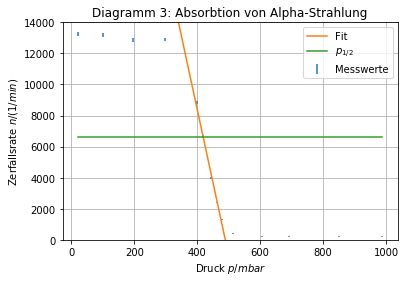

In [11]:
# Aufgabe 4 alpha Strahlung
rg = np.array([4, 9]) # fitte linearen Bereich
popt, pcov = curve_fit(lin, p[0, rg[0]:rg[1]], na[rg[0]:rg[1]])
palpha = np.array([popt, perr(pcov)])

nhalf = na[0]/2
nconst = np.zeros(len(p[0]))
for i in range(len(p[0])):
    nconst[i] = nhalf

phalf = np.array([ (nhalf - palpha[0,1])/palpha[0,0], 
                 np.sqrt( (0.5*dna[0]/palpha[0,1])**2 + (palpha[1,1]/palpha[0,0])**2 + (palpha[1,0]*(nhalf - palpha[0,1])/palpha[0,0]**2) )])
uprint('p_1/2 = ', phalf[0], phalf[1], 'mbar')

# Plot
plt.errorbar(p[0], na, yerr=dna, fmt='', linestyle='none', label='Messwerte')
plt.plot(p[0], lin(p[0], *popt), label='Fit')
plt.plot(p[0], nconst, label='$p_{1/2}$')
plt.title('Diagramm 3: Absorbtion von Alpha-Strahlung')
plt.xlabel('Druck $p/mbar$')
plt.ylabel('Zerfallsrate $n/(1/min)$')
plt.ylim((0, 14000))
#plt.yscale('log')
plt.grid()
plt.legend(loc='best')
plt.savefig("plot 3.pdf", format="pdf")

In [12]:
# Reichweite
s0 = np.array([3.95, 0.05]) # Abstand [cm]
s1 = np.array([ phalf[0]/p0*s0[0],
              phalf[0]/p0*s0[0] * np.sqrt( (phalf[1]/phalf[0])**2 + (s0[1]/s0[0])**2 )])
rho_gl = 2.25 # Flächendichte Zählrohrfenster
brems = 1.43 # Bremsvermögen Zählrohrfenster
s2 = rho_gl/brems
s3 = .68 # Absorption Goldschicht
s = np.array([ s1[0]+s2+s3, s1[1]])
uprint('Reichweite s = ', s[0], s[1], 'cm')
print('Maximalenergie aus Abb. 8 im Skript: E = 5.5+/-0.1 MeV')

Reichweite s = 3.89+/-0.09  cm
Maximalenergie aus Abb. 8 im Skript: E = 5.5+/-0.1 MeV
